# Level 2

> click [here](https://docs.google.com/document/d/1eeV7xn1iit-TvPPws2iqnQQMTsrWOwCD69XO2HX-ILI/edit?tab=t.0) for questions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ecommerce_sales_dataset.csv')
df.head()

,order_id,customer_id,product,category,quantity,unit_price,discount_percent,total_amount,region,payment_mode,order_date
0,10001,2102,Smartwatch,Wearables,1,7538,20,6030.4,East,UPI,2024-05-14
1,10002,2435,Keyboard,Accessories,1,2443,10,2198.7,South,Cash on Delivery,2023-03-26
2,10003,2270,Headphones,Accessories,3,2914,5,8304.9,North,Net Banking,2024-01-21
3,10004,2106,Mouse,Accessories,3,1604,5,4571.4,South,Cash on Delivery,2023-02-22
4,10005,2071,Mouse,Accessories,4,2906,5,11042.8,South,Cash on Delivery,2023-04-25


### Which product category generates the highest total revenue?

In [ ]:
# sum by category
df.groupby('category')['total_amount'].sum().sort_values(ascending = False)

# electronics generate the highest revenue

category
Electronics    45844641.15
Wearables       4037214.55
Accessories     2803178.80
Name: total_amount, dtype: float64

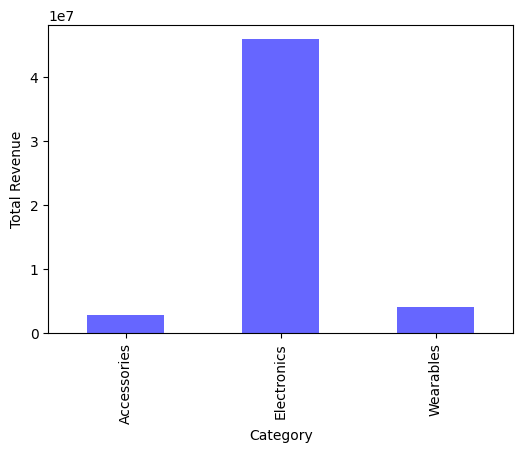

In [7]:
# plot 
plt.figure(figsize = (6,4))
df.groupby('category')['total_amount'].sum().plot(kind = 'bar', color = 'blue', alpha = 0.6)
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.show()

### Compute total revenue per region and rank them.

In [12]:
x = df.groupby('region')['total_amount'].sum().sort_values(ascending = False)
x

region
Central    12119964.85
West       10907411.25
East       10905545.20
North      10333276.95
South       8418836.25
Name: total_amount, dtype: float64

In [15]:
x.rank(ascending=False)
# ranking: 1 -> highest, 5 -> least

region
Central    1.0
West       2.0
East       3.0
North      4.0
South      5.0
Name: total_amount, dtype: float64

### Which product sells the most units (total quantity)?

In [16]:
df[['product', 'quantity']]

,product,quantity
0,Smartwatch,1
1,Keyboard,1
2,Headphones,3
3,Mouse,3
4,Mouse,4
...,...,...
995,Monitor,4
996,Mouse,2
997,Smartphone,1
998,Mouse,2


In [ ]:
df.groupby('product')['quantity'].sum().sort_values(ascending = False)
# Monitor has the highest total quantity sold

product
Monitor       352
Tablet        336
Smartwatch    324
Keyboard      304
Headphones    303
Mouse         297
Smartphone    296
Laptop        294
Name: quantity, dtype: int64

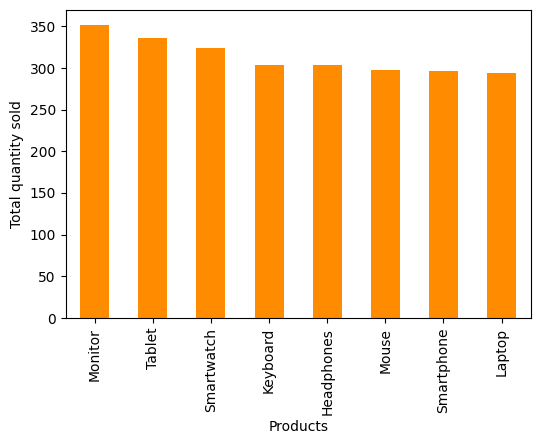

In [24]:
plt.figure(figsize=(6,4))
df.groupby('product')['quantity'].sum().sort_values(ascending = False).plot(kind = 'bar', color = 'darkorange')
plt.xlabel('Products')
plt.ylabel('Total quantity sold')
plt.show()

### Compare average order value across payment modes.

In [ ]:
# order value = total amount
df.groupby('payment_mode')['total_amount'].mean().sort_values(ascending=False)
# UPI is having highest avg order value

payment_mode
UPI                 63276.489100
Cash on Delivery    52500.107711
Net Banking         49333.996154
Credit Card         48853.455952
Debit Card          48643.817760
Name: total_amount, dtype: float64

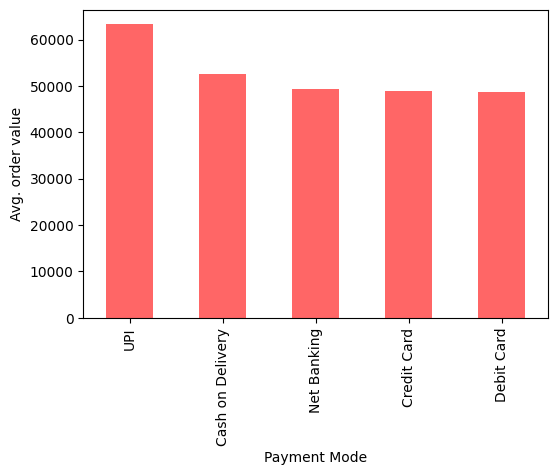

In [25]:
plt.figure(figsize = (6,4))
df.groupby('payment_mode')['total_amount'].mean().sort_values(ascending=False).plot(kind = 'bar', color = 'red', alpha = 0.6)
plt.xlabel('Payment Mode')
plt.ylabel('Avg. order value')
plt.show()

### How does discount percentage affect total order value on average?

In [ ]:
# group order by discount
# average order value for each discount

df.groupby('discount_percent')['total_amount'].mean().sort_values(ascending = False)
# ofcourse, orders having no discount have the highest average value

discount_percent
0     60563.213523
20    54177.293617
5     50652.586047
10    49210.899545
15    45437.692517
Name: total_amount, dtype: float64

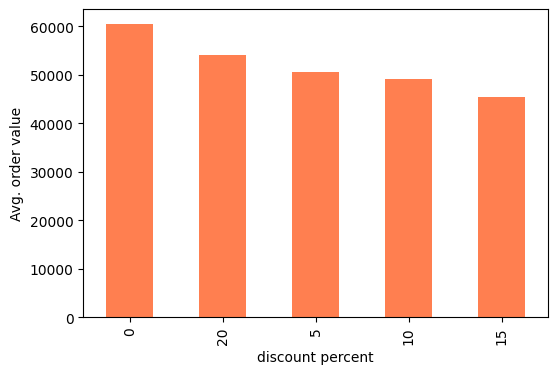

In [30]:
# plot
plt.figure(figsize = (6,4))
df.groupby('discount_percent')['total_amount'].mean().sort_values(ascending = False).plot(kind = 'bar', color = 'coral')
plt.xlabel('discount percent')
plt.ylabel('Avg. order value')
plt.show()

### What is the monthly order count trend?

In [32]:
df.head()

,order_id,customer_id,product,category,quantity,unit_price,discount_percent,total_amount,region,payment_mode,order_date
0,10001,2102,Smartwatch,Wearables,1,7538,20,6030.4,East,UPI,2024-05-14
1,10002,2435,Keyboard,Accessories,1,2443,10,2198.7,South,Cash on Delivery,2023-03-26
2,10003,2270,Headphones,Accessories,3,2914,5,8304.9,North,Net Banking,2024-01-21
3,10004,2106,Mouse,Accessories,3,1604,5,4571.4,South,Cash on Delivery,2023-02-22
4,10005,2071,Mouse,Accessories,4,2906,5,11042.8,South,Cash on Delivery,2023-04-25


In [34]:
# converting date to datetime
df['order_datetime'] = pd.to_datetime(df['order_date'])

In [36]:
df.head()

,order_id,customer_id,product,category,quantity,unit_price,discount_percent,total_amount,region,payment_mode,order_date,order_datetime
0,10001,2102,Smartwatch,Wearables,1,7538,20,6030.4,East,UPI,2024-05-14,2024-05-14
1,10002,2435,Keyboard,Accessories,1,2443,10,2198.7,South,Cash on Delivery,2023-03-26,2023-03-26
2,10003,2270,Headphones,Accessories,3,2914,5,8304.9,North,Net Banking,2024-01-21,2024-01-21
3,10004,2106,Mouse,Accessories,3,1604,5,4571.4,South,Cash on Delivery,2023-02-22,2023-02-22
4,10005,2071,Mouse,Accessories,4,2906,5,11042.8,South,Cash on Delivery,2023-04-25,2023-04-25


In [39]:
df['order_month'] = df['order_datetime'].dt.month
df.head()

,order_id,customer_id,product,category,quantity,unit_price,discount_percent,total_amount,region,payment_mode,order_date,order_datetime,order_month
0,10001,2102,Smartwatch,Wearables,1,7538,20,6030.4,East,UPI,2024-05-14,2024-05-14,5
1,10002,2435,Keyboard,Accessories,1,2443,10,2198.7,South,Cash on Delivery,2023-03-26,2023-03-26,3
2,10003,2270,Headphones,Accessories,3,2914,5,8304.9,North,Net Banking,2024-01-21,2024-01-21,1
3,10004,2106,Mouse,Accessories,3,1604,5,4571.4,South,Cash on Delivery,2023-02-22,2023-02-22,2
4,10005,2071,Mouse,Accessories,4,2906,5,11042.8,South,Cash on Delivery,2023-04-25,2023-04-25,4


In [42]:
# group by order_month 
df['order_month'].value_counts().sort_values(ascending=False)
# January is having the most orders because, there might be new year sale, with more free items and schemes

order_month
1     104
7      96
11     92
9      90
6      88
4      84
12     84
10     78
5      77
3      74
8      67
2      66
Name: count, dtype: int64

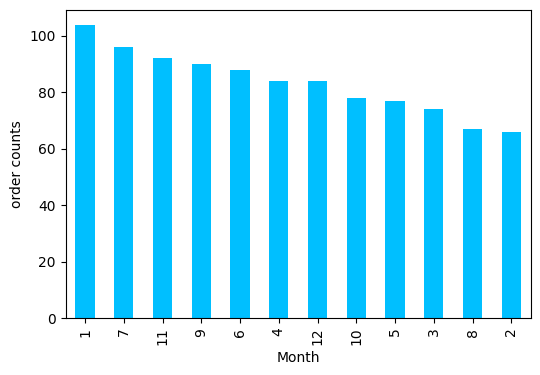

In [43]:
# plot
plt.figure(figsize = (6,4))
df['order_month'].value_counts().plot(kind = 'bar', color = 'deepskyblue')
plt.xlabel('Month')
plt.ylabel('order counts')
plt.show()

### Which product has the highest revenue per order on average?

In [ ]:
df.groupby('product')['total_amount'].mean().sort_values(ascending=False)
# laptop is the highest

product
Laptop        165963.028750
Smartphone     92915.236752
Tablet         61682.353309
Monitor        47637.106786
Smartwatch     30354.996617
Headphones     12119.839130
Keyboard        7162.276400
Mouse           4509.760965
Name: total_amount, dtype: float64

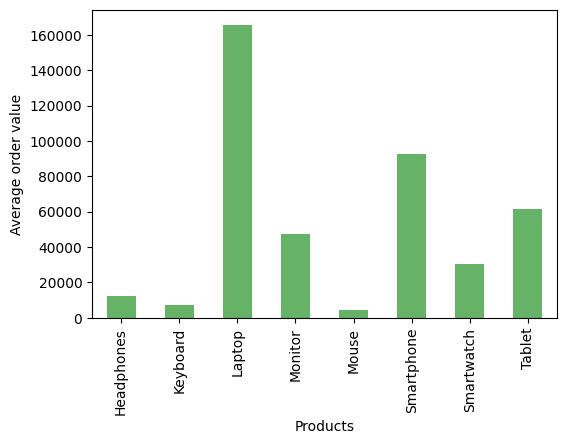

In [47]:
plt.figure(figsize=(6,4))
df.groupby('product')['total_amount'].mean().plot(kind = 'bar', color = 'green', alpha = 0.6)
plt.xlabel('Products')
plt.ylabel('Average order value')
plt.show()

### Identify the top 5 customers by total spending.

In [57]:
df.groupby('customer_id')['total_amount'].max().sort_values(ascending=False).head()

customer_id
2004    358932.0
2094    340500.0
2373    336056.0
2426    292512.0
2075    290037.6
Name: total_amount, dtype: float64

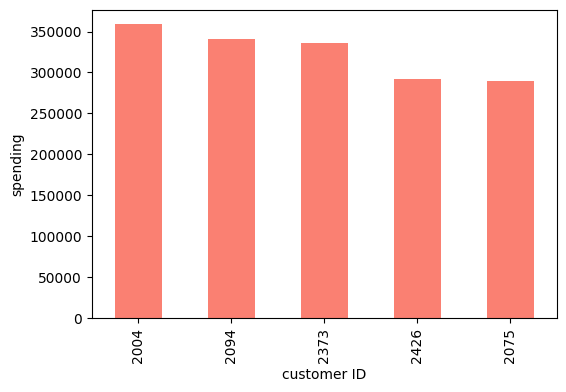

In [58]:
# top 5 highest spending customer
plt.figure(figsize=(6,4))
df.groupby('customer_id')['total_amount'].max().sort_values(ascending=False).head().plot(kind = 'bar', color = 'salmon')
plt.xlabel('customer ID')
plt.ylabel('spending')
plt.show()

### Are higher discounts associated with higher quantities purchased?

In [64]:
df.groupby('discount_percent')['quantity'].mean()

discount_percent
0     2.551601
5     2.453488
10    2.550000
15    2.380952
20    2.606383
Name: quantity, dtype: float64

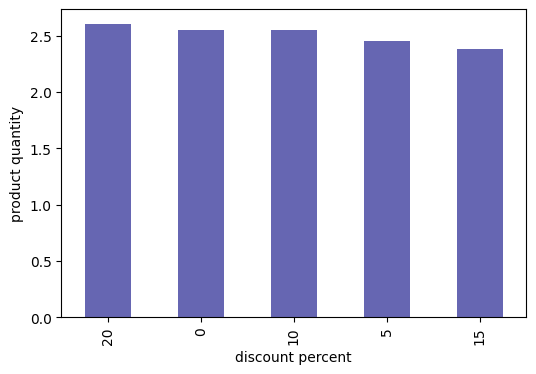

In [68]:
plt.figure(figsize=(6,4))
df.groupby('discount_percent')['quantity'].mean().sort_values(ascending=False).plot(kind = 'bar', color = 'navy', alpha = 0.6)
plt.xlabel('discount percent')
plt.ylabel('product quantity')
plt.show()
# there is no clear correlation
# 20% discount haas highest quantity
# 15% discount haas least quantity
# 0% discount has more quantity than 10% and 5%

### Which region has the highest average order value, not volume?

In [ ]:
df.groupby('region')['total_amount'].mean().sort_values(ascending=False)
# Central region has highest avg. order value

region
Central    61836.555357
East       54527.726000
West       52948.598301
North      51926.014824
South      42305.709799
Name: total_amount, dtype: float64

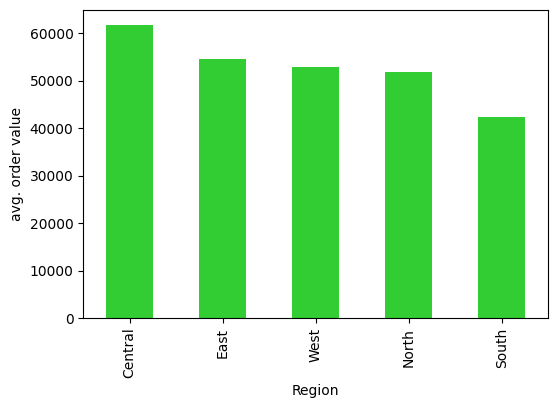

In [71]:
plt.figure(figsize=(6,4))
df.groupby('region')['total_amount'].mean().sort_values(ascending=False).plot(kind = 'bar', color = 'limegreen')
plt.xlabel('Region')
plt.ylabel('avg. order value')
plt.show()